## Init

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [57]:
def griewank_f(X):
    return 1 + 1/4000 * np.sum(X**2) - np.prod(np.cos(X/np.sqrt(np.arange(len(X))+1)))
def michalewicz_f(X):
    return -np.sum(np.sin(X)*np.sin((np.arange(len(X))+1)*(X**2)/np.pi)**6)
def sum_squares(X):
    return np.sum(X**2)
def rastrigin_f(X):
    return 10*len(X) + np.sum(X**2 - 10*np.cos(2*np.pi*X))
def dixon_price_f(X):
    a = X[:-1]
    b = X[1:]
    return (X[0] - 1)**2 + np.sum((np.arange(len(b)) + 2)*((2*b**2-a)**2))
def gftmp(x,y,f):
    return f(np.array([x,y]))

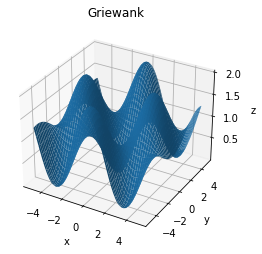

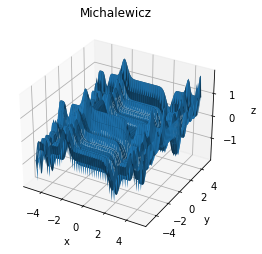

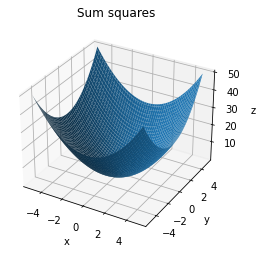

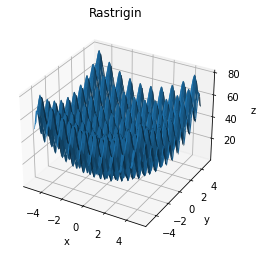

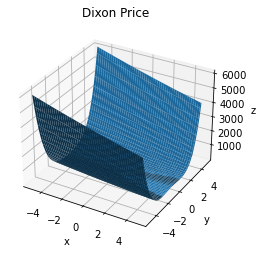

In [58]:
xline = np.linspace(-5, 5, 100)
yline = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xline,yline)
for (name,f) in [('Griewank',griewank_f), ('Michalewicz',michalewicz_f), ('Sum squares', sum_squares)
                ,('Rastrigin', rastrigin_f), ('Dixon Price',dixon_price_f)]:
    zs = np.array([gftmp(x,y,f) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z)
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');




In [59]:
def random_population(mu, d, low, high):
    pop = [(low + (high-low)*np.random.rand(d),np.ones(d).astype(float)) for i in range(mu)]
    return np.array(pop)

def parents_selection(pop_v, lambd):
    if np.sum(np.abs(pop_v)) == 0:
        prop = np.ones(len(pop_v)) / len(pop_v)
    else:
        prop = np.abs(pop_v) / (np.sum(np.abs(pop_v))) # normalization
    parents_idx = np.zeros(lambd)
    for i in range(lambd):
        parents_idx[i] = np.random.choice(np.arange(len(prop)),p=prop) #roulette
    
    return parents_idx.astype(int)

def mutation(x, tau, tau0):
    x_v = x[0].copy()
    sigma_v =x[1].copy()
    eps0 = np.random.normal(0,tau0)
    eps_v = np.array([np.random.normal(0,tau) + eps0 for i in range(len(sigma_v))])
    sigma_v = np.exp(eps_v) * sigma_v
    x_v = np.array([x + np.random.normal(0,sigma) for (x,sigma) in zip(x_v, sigma_v)])

    return (x_v, sigma_v)

def best_idx(p_v, mu):
    return np.argpartition(p_v,mu)[:mu]

In [60]:
def run_instance(func,num_iterations=1000, d=30, K=0.2, mu=100, lambd=150, low=-20, high=20, plus=False):
    scores = np.zeros(num_iterations)
    p = random_population(mu, d, low, high)
    tau = K / np.sqrt(2*d)
    tau0 = K / np.sqrt(2*np.sqrt(d))
    for t in range(num_iterations):
        pop_v = np.array([func(x) for (x,sigma) in p])
        parents_idx = parents_selection(pop_v, lambd)
        children = []
        for i in range(len(parents_idx)):
            children.append(np.array([p[parents_idx[:i+1]][:,0].mean(axis=0),p[parents_idx[:i+1]][:,1].mean(axis=0)]))
        children = np.array(children)
        children = np.array([mutation(c, tau, tau0) for c in children])
        if plus:
            candidates =  np.concatenate((children, p[parents_idx]))
        else:
            candidates = children
        candidates[:,0][candidates[:,0] < low] = low
        candidates[:,0][candidates[:,0] > high] = high
        candidates_v = np.array([func(x) for (x,sigma) in candidates])
        p = candidates[best_idx(candidates_v, mu)]
        scores[t] = candidates_v.min()
    return scores

In [61]:
def get_G(function, h, d):
    A = np.random.rand(d,h)
    b = np.random.rand(d)
    def G(y):
        return function(A@y+b)
    return G

In [62]:
instances = [
    'Griewank Function',(griewank_f,500,60,0.2,100,150,-600,600,True), (griewank_f,3000,120,0.25,120,170,-600,600,False),(griewank_f,3000,120,0.3,120,170,-600,600,True),
    'Michalewicz Function', (michalewicz_f,500,10,0.2,100,150,0,np.pi,True), (michalewicz_f,3000,100,0.25,120,170,0,np.pi,False),(michalewicz_f,3000,100,0.3,120,170,0,np.pi,True),
    'Sum squares Function', (sum_squares,500,60,0.2,100,150,-10,10,True), (sum_squares,3000,120,0.25,120,170,-50,50,False),(sum_squares,3000,120,0.3,120,170,-500,500,True),
    'Rastrigin Function', (rastrigin_f,500,60,0.2,100,150,-5.12,5.12,True), (rastrigin_f,3000,120,0.25,120,170,-5.12,5.12,False),(rastrigin_f,3000,120,0.3,120,170,-5.12,5.12,True),
    'Dixon Price Function', (dixon_price_f,500,60,0.2,100,150,-10,10,True), (dixon_price_f,3000,120,0.25,120,170,-20,20,False),(dixon_price_f,3000,120,0.3,120,170,-100,100,True),
    'ZADANIE 3: h=10*d',
    'Griewank Function',(get_G(griewank_f,60*10,60),500,60*10,0.2,100,150,-600,600,True), (get_G(griewank_f,90*10,90),3000,90*10,0.25,120,170,-600,600,False),
    'Michalewicz Function', (get_G(michalewicz_f,10*10,10),500,10*10,0.2,100,150,0,np.pi,True), (get_G(michalewicz_f,100*10,100),3000,100*10,0.25,120,170,0,np.pi,False),
    'Sum squares Function', (get_G(sum_squares,60*10,60),500,60*10,0.2,100,150,-10,10,True), (get_G(sum_squares,90*10,90),3000,90*10,0.25,120,170,-50,50,False),
    'Rastrigin Function', (get_G(rastrigin_f,60*10,60),500,60*10,0.2,100,150,-5.12,5.12,True), (get_G(rastrigin_f,90*10,90),3000,90*10,0.25,120,170,-5.12,5.12,False),
    'Dixon Price Function', (get_G(dixon_price_f,60*10,60),500,60*10,0.2,100,150,-10,10,True), (get_G(dixon_price_f,90*10,90),3000,90*10,0.25,120,170,-20,20,False),
    'h=d',
    'Griewank Function',(get_G(griewank_f,100,100),500,100,0.2,100,150,-600,600,True), (get_G(griewank_f,100,100),3000,100,0.25,120,170,-600,600,False),
    'Michalewicz Function', (get_G(michalewicz_f,100,100),500,100,0.2,100,150,0,np.pi,True), (get_G(michalewicz_f,100,100),3000,100,0.25,120,170,0,np.pi,False),
    'Sum squares Function', (get_G(sum_squares,100,100),500,100,0.2,100,150,-10,10,True), (get_G(sum_squares,100,100),3000,100,0.25,120,170,-50,50,False),
    'Rastrigin Function', (get_G(rastrigin_f,100,100),500,100,0.2,100,150,-5.12,5.12,True), (get_G(rastrigin_f,100,100),3000,100,0.25,120,170,-5.12,5.12,False),
    'Dixon Price Function', (get_G(dixon_price_f,100,100),500,100,0.2,100,150,-10,10,True), (get_G(dixon_price_f,100,100),3000,100,0.25,120,170,-20,20,False)
]

In [63]:
costs_inst = []

In [ ]:
for i in instances:
    if type(i) != str:
        costs = run_instance(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8])
        costs_inst.append((i,costs))
    else:
        costs_inst.append(i)

In [ ]:
for c in costs_inst:
    if type(c) == str:
        print(c)
    else:
        print(c[0], c[1].min())
        plt.figure()
        plt.plot(c[1])
        plt.show()

### zad2

In [ ]:
penalty = 10000
epsilon = 1e-2
def G3(x):
    ans = 0
    n = len(x)
    if abs(np.sum(x**2) - n) > epsilon:
        ans+=penalty
    return ans-(np.sqrt(n)**n * np.prod(x))

def G13(x):
    ans = 0
    if abs(np.sum(x[:5]**2) - 10) > epsilon:
        ans = penalty
    if abs(x[1]*x[2] - 5*x[3]*x[4]) > epsilon:
        ans = penalty
    if abs(x[0]**3 + x[1]**3 + 1) > epsilon:
        ans = penalty
    return ans + np.exp(np.prod(x))

def G2(x):
    ans = 0
    if -np.prod(x) + 0.75 > 0:
        ans = penalty
    if np.sum(x) - 7.5*len(x) > 0:
        ans = penalty
    
    return ans-(abs((np.sum(np.cos(x)**4) - 2*np.prod(np.cos(x)**2))/np.sqrt(np.sum((np.arange(len(x)) + 1)*(x**2)))))

def G8(x):
    ans = 0
    if x[0]**2 - x[1] + 1 > 0:
        ans = penalty
    if 1 - x[0] + (x[1]-4)**2 > 0:
        ans = penalty
        
    return ans + (np.sin(2*np.pi*x[0])**3 * np.sin(2*np.pi*x[1]))/(x[0]**3 * (x[0] + x[1]))

def G11(x):
    ans = 0
    if abs(x[1]-x[0]**2) > epsilon:
        ans = penalty
    return x[0]**2 + (x[1] + 1)**2 + ans

In [ ]:
instances_2 = [
    'G2 opt: 0.803619',(G2,1000,20,0.25,1500,3000,0.0001,10,True),
    'G3 opt: 1',(G3,1000,10,0.25,1500,3000,0,1,True),
    'G8 opt: 0.095825',(G8,1000,2,0.2,1500,3000,0.5,5,True),
    'G11 opt: 0.75',(G11,1000,2,0.25,1500,3000,-1,1,True),
     'G13 opt: 0.0539498',(G13,1000,5,0.25,1500,3000,-2,2,True),
]

In [ ]:
costs_inst_2 = [] 

In [ ]:
for i in instances_2:
    if type(i) != str:
        costs = run_instance(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8])
        costs_inst_2.append((i,costs))
    else:
        print(i)
        costs_inst_2.append(i)

In [ ]:
for c in costs_inst_2:
    if type(c) == str:
        print(c)
    else:
        print(c[0], c[1].min())
        plt.figure()
        plt.plot(c[1])
        plt.show()

In [ ]:
cst = run_instance(rastrigin_f,200,60,0.2,1000,2000,-5.12,5.12,True)

In [ ]:
print(cst.min())
plt.figure()
plt.plot(cst)
plt.show()